In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Choosing features Annual Income and Spending Score for our model
dataset=df.iloc[:,[3,4]].values

In [ ]:
#Using elbow method to find out the optimum amount of clusters
from sklearn.cluster import KMeans
wcss=[]
#wcss-within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

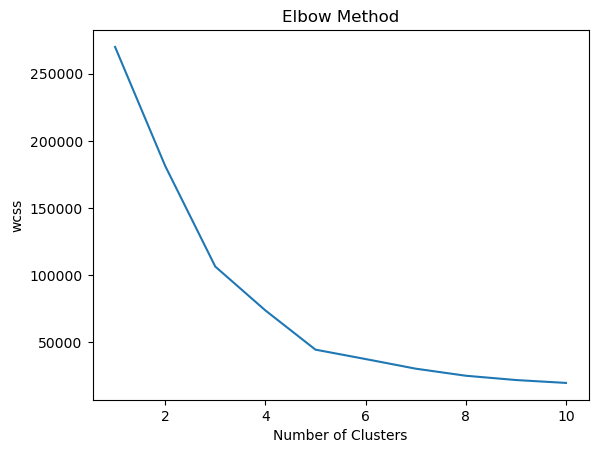

In [9]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
#Considering n=5
model=KMeans(n_clusters=5,init='k-means++',random_state=101)

In [ ]:
y_kmc=model.fit_predict(dataset)

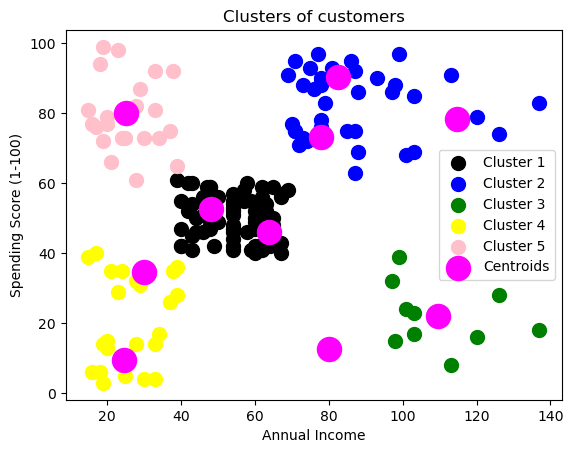

In [19]:
plt.scatter(dataset[y_kmc == 0, 0], dataset[y_kmc == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(dataset[y_kmc == 1, 0], dataset[y_kmc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset[y_kmc == 2, 0], dataset[y_kmc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataset[y_kmc == 3, 0], dataset[y_kmc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(dataset[y_kmc == 4, 0], dataset[y_kmc == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
#Cluster4-Earning less and also spending less
#Cluster5-Earning less but spending more
#Cluster1-Earning and spending average amount of money
#Cluster3-Earning more but spending less
#Cluster2- Earning more and also spending more(OUR TARGET CLASS)
